In [1]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

### Basic Linear Regression using PyTorch

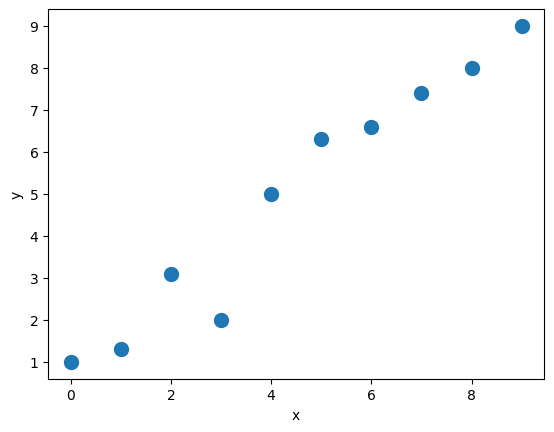

In [2]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 
                    6.3, 6.6,7.4, 8.0,
                    9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [4]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):
    return xb @ weight + bias

In [5]:
def loss_fn(input, target):
    return (input-target).pow(2).mean()

In [6]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_() 
            bias.grad.zero_()   
        if epoch % log_epochs==0:
            print(f'Epoch {epoch}  Loss {loss.item():.4f}')


Epoch 0  Loss 26.1645
Epoch 0  Loss 51.6394
Epoch 0  Loss 3.2416
Epoch 0  Loss 34.2775
Epoch 0  Loss 4.0691
Epoch 0  Loss 12.5163
Epoch 0  Loss 5.2662
Epoch 0  Loss 31.3576
Epoch 0  Loss 62.2556
Epoch 0  Loss 39.8977
Epoch 10  Loss 27.3883
Epoch 10  Loss 9.1237
Epoch 10  Loss 34.2721
Epoch 10  Loss 1.8903
Epoch 10  Loss 41.7755
Epoch 10  Loss 20.5131
Epoch 10  Loss 2.6665
Epoch 10  Loss 3.0358
Epoch 10  Loss 18.0895
Epoch 10  Loss 23.7719
Epoch 20  Loss 2.2393
Epoch 20  Loss 18.1441
Epoch 20  Loss 22.8591
Epoch 20  Loss 13.6344
Epoch 20  Loss 13.1109
Epoch 20  Loss 27.7845
Epoch 20  Loss 1.1664
Epoch 20  Loss 6.5079
Epoch 20  Loss 17.0177
Epoch 20  Loss 1.0158
Epoch 30  Loss 12.6522
Epoch 30  Loss 1.6703
Epoch 30  Loss 19.0031
Epoch 30  Loss 4.8064
Epoch 30  Loss 11.7776
Epoch 30  Loss 0.5411
Epoch 30  Loss 8.8321
Epoch 30  Loss 0.3889
Epoch 30  Loss 9.4197
Epoch 30  Loss 14.8444
Epoch 40  Loss 0.2667
Epoch 40  Loss 7.0808
Epoch 40  Loss 7.8598
Epoch 40  Loss 3.5674
Epoch 40  Loss 10.0

Final Parameters: 2.644019603729248 4.712854862213135


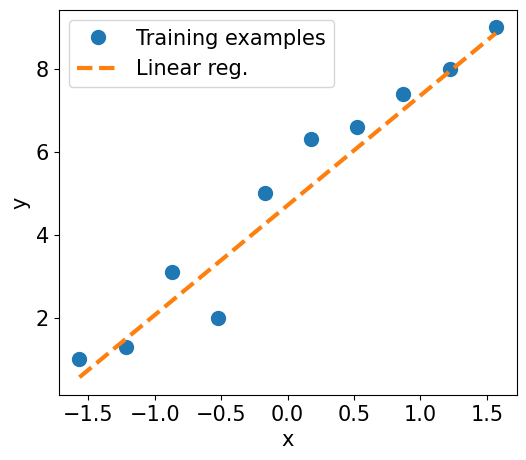

In [7]:
print('Final Parameters:', weight.item(), bias.item())
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

### Model training via the torch.nn and torch.optim modules

In [8]:
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
         # 1. Generate predictions
        pred = model(x_batch)[:, 0]
         # 2. Calculate loss
        loss = loss_fn(pred, y_batch)
         # 3. Compute gradients
        loss.backward()
         # 4. Update parameters using gradients
        optimizer.step()
         # 5. Reset the gradients to zero
        optimizer.zero_grad()    
    if epoch % log_epochs==0:
         print(f'Epoch {epoch}  Loss {loss.item():.4f}')


Epoch 0  Loss 24.6684
Epoch 10  Loss 29.1377
Epoch 20  Loss 20.9207
Epoch 30  Loss 0.1257
Epoch 40  Loss 12.4922
Epoch 50  Loss 1.7845
Epoch 60  Loss 7.6425
Epoch 70  Loss 2.5606
Epoch 80  Loss 0.0157
Epoch 90  Loss 0.7548
Epoch 100  Loss 0.8412
Epoch 110  Loss 0.4923
Epoch 120  Loss 0.0823
Epoch 130  Loss 0.0794
Epoch 140  Loss 0.0891
Epoch 150  Loss 0.0973
Epoch 160  Loss 0.1043
Epoch 170  Loss 0.1103
Epoch 180  Loss 0.0009
Epoch 190  Loss 0.0764


In [10]:
print('Final Parameters:', model.weight.item(), model.bias.item())

Final Parameters: 2.6496422290802 4.87706995010376


### Building a multilayer perceptron for classifying flowers in the Iris dataset

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

In [12]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train) 
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [21]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        # Call the parent class (nn.Module) constructor
        super().__init__()
        
        # Define the first linear layer with input size and hidden size
        self.layer1 = nn.Linear(input_size, hidden_size)
        
        # Define the second linear layer with hidden size and output size
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Pass the input through the first linear layer
        x = self.layer1(x)
        
        # Apply the Sigmoid activation function to the output of the first layer
        x = nn.Sigmoid()(x)
        
        # Pass the result through the second linear layer
        x = self.layer2(x)
        
        # Apply the Softmax activation function to the output of the second layer
        x = nn.Softmax(dim=1)(x)
        # Return the final output
        return x
    
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3 
model = Model(input_size, hidden_size, output_size)

In [22]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [23]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)


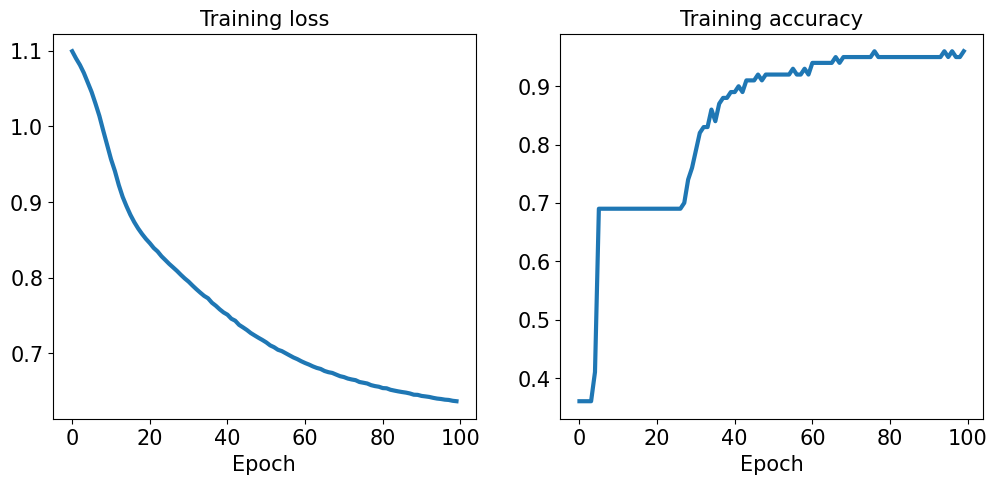

In [24]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [25]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [ ]:
# path = 'iris_classifier.pt'
# torch.save(model, path)